In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   v1          5572 non-null   str  
 1   v2          5572 non-null   str  
 2   Unnamed: 2  50 non-null     str  
 3   Unnamed: 3  12 non-null     str  
 4   Unnamed: 4  6 non-null      str  
dtypes: str(5)
memory usage: 217.8 KB


In [6]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3983,ham,"Hey, I missed you tm of last night as my phone..."
3232,ham,Height of recycling: Read twice- People spend ...
5441,ham,"By the way, make sure u get train to worc fore..."
5046,ham,Hmmm.still we dont have opener?
4353,spam,important information 4 orange user 0789xxxxxx...


In [8]:
# renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4237,ham,Lol wtf random. Btw is that your lunch break
4345,ham,You still around? I could use a half-8th
1740,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...
516,spam,Boltblue tones for 150p Reply POLY# or MONO# e...
566,ham,Oooh bed ridden ey? What are YOU thinking of?


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(403)

In [14]:
df = df.drop_duplicates(keep='first')

## EDA

In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

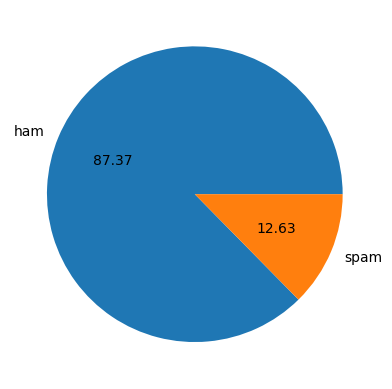

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2F')
plt.show()

data is imbalance

In [17]:
import nltk

In [18]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrk00\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mrk00\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrk00\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# ham massages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# spam massages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

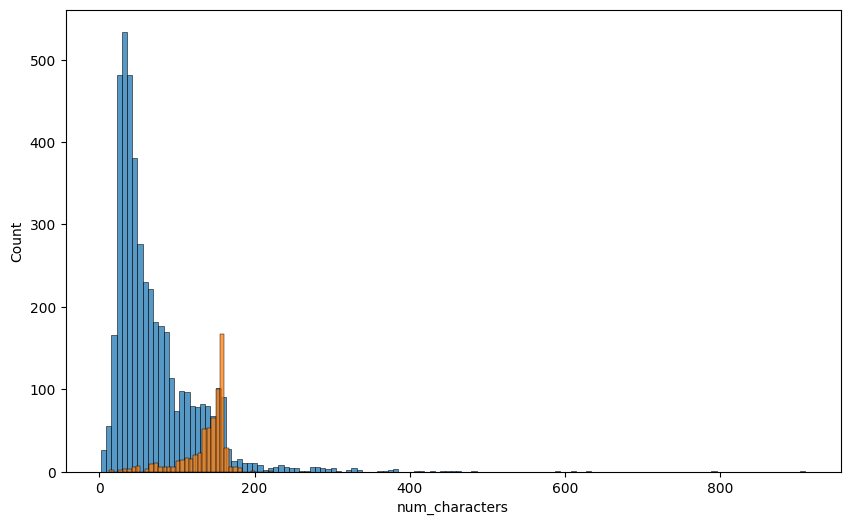

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

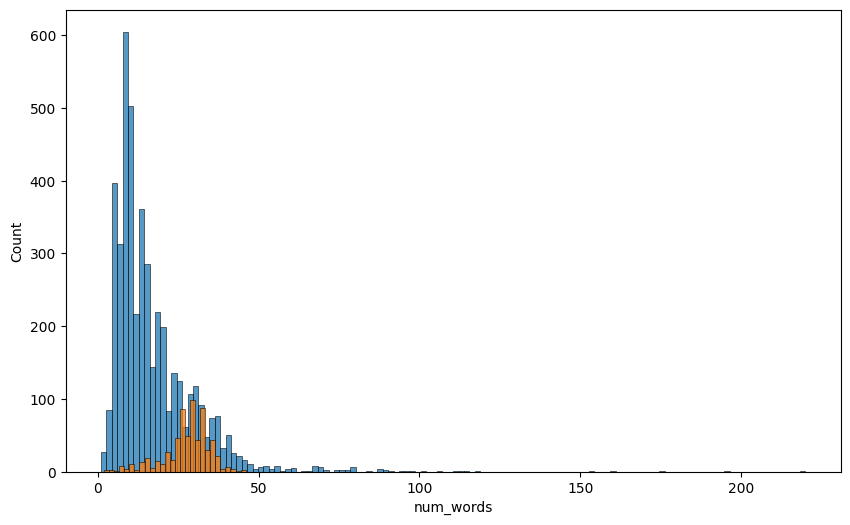

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])

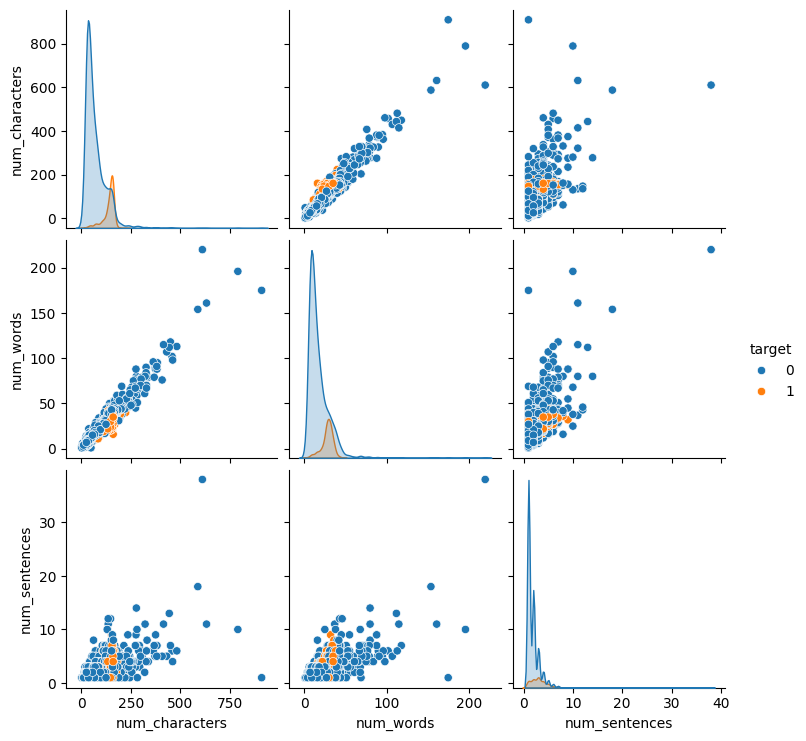

In [29]:
sns.pairplot(df,hue='target')

In [30]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

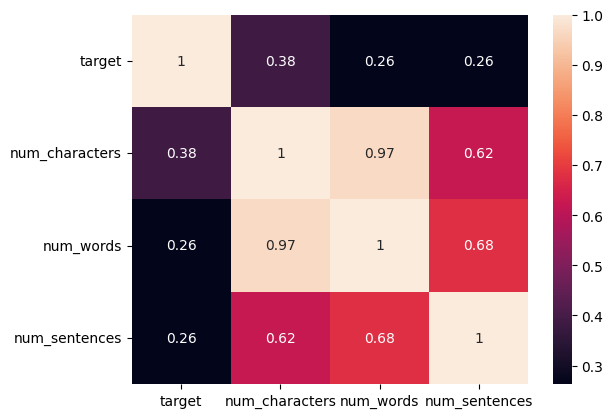

In [31]:
sns.heatmap(numeric_df.corr(),annot=True)

## Data Preprossing
- Lower Case
- Tokenization
- Removing Special charaters
- REmoving stop words and ppunctuation
- steamming

In [32]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()

In [33]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
         y.append(ps.stem(i))


    return y

In [34]:
transform_text(df['text'][10])

['gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today']

In [35]:
df['transformed_text'] = df['text'].apply(transform_text)

In [36]:
df['transformed_text'] = df['transformed_text'].apply(
    lambda x:" ".join(x) if isinstance(x,list) else x
)

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### WordCloud

In [38]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [39]:
spam_wc =  wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

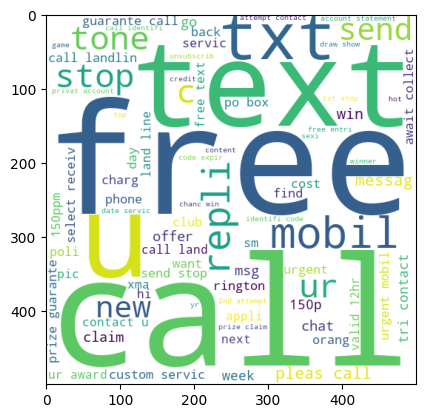

In [40]:
plt.imshow(spam_wc)

In [41]:
ham_wc =  wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

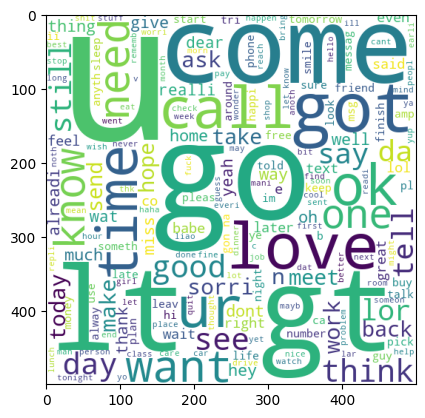

In [42]:
plt.imshow(ham_wc)

In [43]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [44]:
len(spam_corpus)

9939

C:\Users\mrk00\AppData\Local\Temp\ipykernel_8688\4010490464.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='coolwarm')


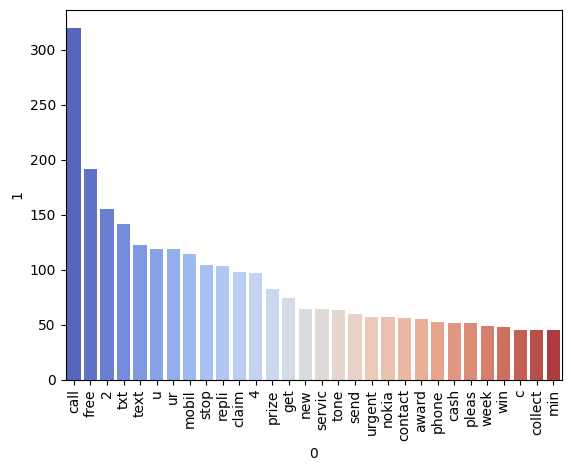

In [45]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='coolwarm')
plt.xticks(rotation="vertical")
plt.show()

In [46]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
len(ham_corpus)

35404

C:\Users\mrk00\AppData\Local\Temp\ipykernel_8688\3577430568.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='coolwarm')


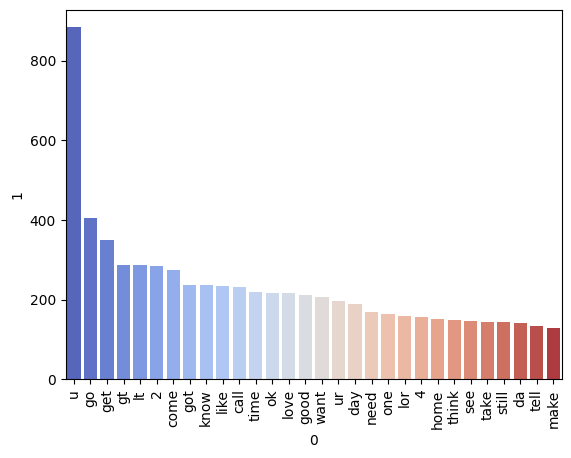

In [48]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='coolwarm')
plt.xticks(rotation="vertical")
plt.show()

## Model Building

In [75]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [76]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [77]:
X.shape

(5169, 3000)

In [78]:
y = df['target'].values

In [79]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [82]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [83]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [84]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [85]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [86]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


tfidf --> mnb

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [88]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state= 2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)


In [89]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BGC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XGB' : xgb

}

In [90]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy, precision

In [91]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [92]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print('For ',name)
    print('Accuracy - ',current_accuracy)
    print('Precision - ',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9342359767891683
Precision -  0.85
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96


c:\Users\mrk00\Downloads\ashish\Sms spam classifier\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\mrk00\Downloads\ashish\Sms spam classifier\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BGC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  XGB
Accuracy -  0.9680851063829787
Precision -  0.9487179487179487


In [93]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values(by='Accuracy', ascending=False)

In [94]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
5,RF,0.973888,0.982609
2,NB,0.970986,1.000000
10,XGB,0.968085,0.948718
7,BGC,0.958414,0.868217
4,LR,0.955513,0.960000
9,GBDT,0.950677,0.930693
3,DT,0.934236,0.850000
6,AdaBoost,0.921663,0.820225


In [95]:
performance_df1 = pd.melt(performance_df,id_vars= 'Algorithm')

In [96]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,ETC,Accuracy,0.974855
2,RF,Accuracy,0.973888
3,NB,Accuracy,0.970986
4,XGB,Accuracy,0.968085
5,BGC,Accuracy,0.958414
6,LR,Accuracy,0.955513
7,GBDT,Accuracy,0.950677
8,DT,Accuracy,0.934236
9,AdaBoost,Accuracy,0.921663


(0.5, 1.0)

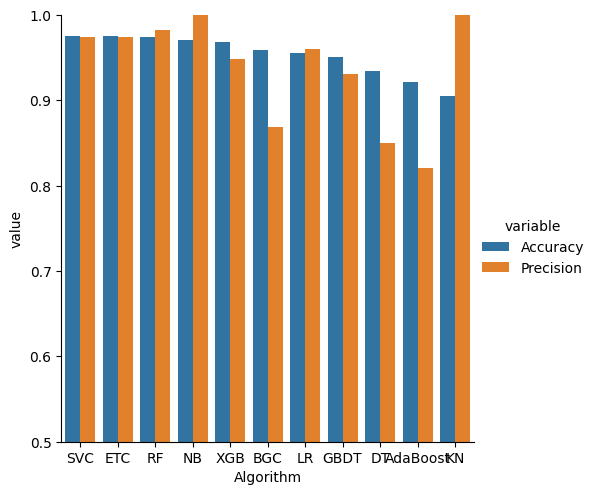

In [97]:
sns.catplot(x= 'Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)



## model improve
1. Change the max_feature parameter of TfIdf

In [100]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000' : accuracy_scores,'Precision_max_ft_3000': precision_scores})

In [101]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.975822,0.974790,0.975822,0.974790
1,ETC,0.974855,0.974576,0.974855,0.974576
2,RF,0.973888,0.982609,0.973888,0.982609
3,NB,0.970986,1.000000,0.970986,1.000000
4,XGB,0.968085,0.948718,0.968085,0.948718
5,BGC,0.958414,0.868217,0.958414,0.868217
6,LR,0.955513,0.960000,0.955513,0.960000
7,GBDT,0.950677,0.930693,0.950677,0.930693
8,DT,0.934236,0.850000,0.934236,0.850000
9,AdaBoost,0.921663,0.820225,0.921663,0.820225


In [102]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))